## Answer: 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('instagram_reach.csv')
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [6]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [7]:
df.shape

(100, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [9]:
df = df.drop(['Unnamed: 0', 'S.No', 'USERNAME','Caption', 'Hashtags'], axis=1)

In [10]:
df.head()

,Followers,Time since posted,Likes
0,1600,11 hours,139
1,880,2 hours,23
2,255,2 hours,25
3,340,3 hours,49
4,304,3 hours,30


In [11]:
df.columns

Index(['Followers', 'Time since posted', 'Likes'], dtype='object')

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Followers', 'Likes']

We have 1 categorical features : ['Time since posted']


In [17]:
df.dtypes

Followers             int64
Time since posted    object
Likes                 int64
dtype: object

In [31]:
# Assuming df is your DataFrame containing the data
df['Time since posted'] = df['Time since posted'].map(lambda x: str(x).replace('hours', '')).astype(int)

In [32]:
df.dtypes

Followers            int64
Time since posted    int64
Likes                int64
dtype: object

In [33]:
df.head()

,Followers,Time since posted,Likes
0,1600,11,139
1,880,2,23
2,255,2,25
3,340,3,49
4,304,3,30


In [34]:
# Splitting X and y for all Experiments
X = df.drop(['Likes', 'Time since posted'], axis=1)
y = df[['Likes', 'Time since posted']]

In [35]:
X.head()

,Followers
0,1600
1,880
2,255
3,340
4,304


In [36]:
y.head()

,Likes,Time since posted
0,139,11
1,23,2
2,25,2
3,49,3
4,30,3


In [37]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import  train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [38]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: MAE, MSE, RMSE, r2score
    '''
    MAE = mean_absolute_error(true, predicted) # Calculate Mean Absolute Error
    MSE = mean_squared_error(true, predicted) # Calculate Mean Squared Error
    RMSE =np.sqrt(MSE) # Calculate Root Mean Squared Error
    r2score = r2_score(true, predicted)  # Calculate R_squaredScore/R2score
    return MAE, MSE, RMSE, r2score

In [39]:
# Dictionary which contains models for experiment
models = {
    "Linear Regresson": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor ": Lasso(),
    "Elastic Net Regressor": ElasticNet(),
    "SVR": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
    }

In [40]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics.
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

    # Applying Satndard Normalization method (Z-Score Equation):
    scalar = StandardScaler()
    X_train = scalar.fit_transform(X_train)
    X_test = scalar.transform(X_test)

    models_list = []
    MAE_train_list = []
    MAE_test_list = []
    MSE_train_list = []
    MSE_test_list = []
    RMSE_train_list = []
    RMSE_test_list = []
    r2score_train_list = []
    r2score_test_list = []
    r2score_diff = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        wrapper = MultiOutputRegressor(model)
        wrapper.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = wrapper.predict(X_train)
        y_test_pred = wrapper.predict(X_test)

        # Training set performance
        model_train_MAE, model_train_MSE, model_train_RMSE,\
        model_train_r2score = evaluate_clf(y_train ,y_train_pred)

        MAE_train_list.append(model_train_MAE)
        MSE_train_list.append(model_train_MSE)
        RMSE_train_list.append(model_train_RMSE)
        r2score_train_list.append(model_train_r2score*100)

        # Test set performance
        model_test_MAE,model_test_MSE,model_test_RMSE,\
        model_test_r2score = evaluate_clf(y_test, y_test_pred)

        MAE_test_list.append(model_test_MAE)
        MSE_test_list.append(model_test_MSE)
        RMSE_test_list.append(model_test_RMSE)
        r2score_test_list.append(model_test_r2score*100)

        # r2score_train_test_difference
        r2score_diff.append(max(model_train_r2score, model_test_r2score) -
                            min(model_train_r2score, model_test_r2score))

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- MAE: {:.4f}".format(model_train_MAE))
        print('- MSE: {:.4f}'.format(model_train_MSE))
        print('- RMSE: {:.4f}'.format(model_train_RMSE))
        print('- r2score: {:.4f}'.format(model_train_r2score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- MAE: {:.4f}'.format(model_test_MAE))
        print('- MSE: {:.4f}'.format(model_test_MSE))
        print('- RMSE: {:.4f}'.format(model_test_RMSE))
        print('- r2score: {:.4f}'.format(model_test_r2score))

        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, MAE_train_list, MAE_test_list, MSE_train_list, MSE_test_list, RMSE_train_list, RMSE_test_list, r2score_train_list,  r2score_test_list, r2score_diff)), columns=['Model Name', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test', 'RMSE_train', 'RMSE_test', 'r2score_train', 'r2score_test','r2score_diff']).sort_values(by='r2score_test',ascending=False)

    return report

In [41]:
report = evaluate_models(X, y, models)

Linear Regresson
Model performance for Training set
- MAE: 17.5807
- MSE: 1602.0695
- RMSE: 40.0259
- r2score: 0.0616
----------------------------------
Model performance for Test set
- MAE: 13.8839
- MSE: 600.1911
- RMSE: 24.4988
- r2score: 0.0912


Ridge Regressor
Model performance for Training set
- MAE: 17.5809
- MSE: 1602.0850
- RMSE: 40.0261
- r2score: 0.0616
----------------------------------
Model performance for Test set
- MAE: 13.9201
- MSE: 601.1638
- RMSE: 24.5186
- r2score: 0.0903


Lasso Regressor 
Model performance for Training set
- MAE: 17.5838
- MSE: 1602.9287
- RMSE: 40.0366
- r2score: 0.0296
----------------------------------
Model performance for Test set
- MAE: 14.1422
- MSE: 606.2384
- RMSE: 24.6219
- r2score: 0.0605


Elastic Net Regressor
Model performance for Training set
- MAE: 17.6292
- MSE: 1615.1141
- RMSE: 40.1885
- r2score: 0.0410
----------------------------------
Model performance for Test set
- MAE: 14.9514
- MSE: 634.5413
- RMSE: 25.1901
- r2score: 0

In [42]:
report

,Model Name,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,r2score_train,r2score_test,r2score_diff
10,Random Forest Regressor,8.078138,7.612158,295.541423,189.372449,17.191318,13.761266,80.503900,67.290276,0.132136
7,Gradient Boosting,4.490578,5.706396,56.465441,95.768346,7.514349,9.786130,96.971578,56.700040,0.402715
9,Decision Tree Regressor,0.343750,5.900000,2.446875,97.550000,1.564249,9.876740,99.320131,49.905195,0.494149
5,K-Neighbors Regressor,16.017500,11.600000,1348.780000,541.348000,36.725740,23.266886,20.043366,28.017093,0.079737
6,AdaBoost Regressor,11.842556,12.064640,544.040788,465.759478,23.324682,21.581461,76.604922,25.649933,0.509550
0,Linear Regresson,17.580735,13.883913,1602.069510,600.191075,40.025861,24.498797,6.159988,9.115915,0.029559
1,Ridge Regressor,17.580918,13.920061,1602.084956,601.163820,40.026053,24.518642,6.159049,9.033023,0.028740
2,Lasso Regressor,17.583754,14.142214,1602.928687,606.238364,40.036592,24.621908,2.959257,6.049291,0.030900
3,Elastic Net Regressor,17.629167,14.951446,1615.114092,634.541261,40.188482,25.190102,4.099269,5.072964,0.009737
8,XGBRegressor,0.592887,12.072101,2.635528,772.203181,1.623431,27.788544,99.314431,-4.268208,1.035826


In [43]:
final_model = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state=42, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
wrapper = MultiOutputRegressor(final_model)

final_model = wrapper.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final RandomForest Regressor Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final RandomForest Regressor Accuracy Score (Test) :", r2_score(y_pred,y_test))


Final RandomForest Regressor Accuracy Score (Train) : 0.7237372044670499
Final RandomForest Regressor Accuracy Score (Test) : 0.13164184324864386


In [44]:
# Let's predict:
print(X_test[2])
y_pred = final_model.predict([X_test[0]])
y_pred
print("Nnumber of Likes: ", y_pred[0][0])
print("Time since posted: ", y_pred[0][1], 'hours')

[0.15081552]
Nnumber of Likes:  16.49504843914686
Time since posted:  2.1065460564241234 hours


## Answer:2

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [48]:
df.shape

(13320, 9)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [51]:
for column in df.columns:
  print(df[column].value_counts())
  print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [52]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [53]:
df.drop(columns = ['area_type','availability','society','balcony'],inplace=True)

In [54]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [56]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [58]:
df['location'] = df['location'].fillna('Sarjapur  Road')

In [59]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [60]:
df['size'] = df['size'].fillna('2 BHK')

In [61]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [64]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [65]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [66]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [67]:
def convertRange(x):
  temp = x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [68]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [69]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [70]:
df['Price_per_square_feet'] = df['price']*100000 / df['total_sqft']

In [72]:
df['Price_per_square_feet']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: Price_per_square_feet, Length: 13320, dtype: float64

In [73]:
df.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [75]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [76]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [77]:
location_count

Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [78]:
location_count_less_10 = location_count[location_count<10]
location_count_less_10

Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 1040, dtype: int64

In [79]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [81]:
df.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [85]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [86]:
df = df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [87]:
df.shape

(12530, 7)

In [89]:
df.Price_per_square_feet.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_square_feet, dtype: float64

In [83]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.Price_per_square_feet)
    st = np.std(subdf.Price_per_square_feet)

    gen_df = subdf[(subdf.Price_per_square_feet > (m-st))&(subdf.Price_per_square_feet <= (m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index = True)
  return df_output
data = remove_outliers_sqft(df)

In [84]:
data.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000
mean,1536.635566,2.603371,104.593878,2.718491,6285.768035
std,1142.361892,1.206490,134.951057,1.153099,3589.641233
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4285.714286
50%,1280.000000,2.000000,70.000000,3.000000,5309.734513
75%,1660.000000,3.000000,110.000000,3.000000,6837.606838
max,52272.000000,27.000000,3600.000000,27.000000,53150.000000


In [90]:
# BHK Outliers :
def bhk_outlier_remove(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.Price_per_square_feet)
          ,'std':np.std(bhk_df.Price_per_square_feet)
          ,'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_square_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [91]:
df = bhk_outlier_remove(df)

In [92]:
df.shape

(12530, 7)

In [93]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,Price_per_square_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [94]:
drop_col = ['size','Price_per_square_feet']
df.drop(drop_col,axis=1,inplace=True)

In [95]:
df.to_csv('Cleaned_data.csv')

## Exploratory Data Analysis

In [96]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [99]:
# Only 1 categorical column = 'location'
cat_col = ['location']
df['location'].nunique()

255

In [100]:
df['location'].value_counts()

other                   2436
Whitefield               538
Sarjapur  Road           396
Electronic City          295
Kanakpura Road           269
                        ... 
Thyagaraja Nagar           7
5th Block Hbr Layout       7
Vishveshwarya Layout       7
Marsur                     5
BTM 1st Stage              5
Name: location, Length: 255, dtype: int64

<Axes: xlabel='count', ylabel='bath'>

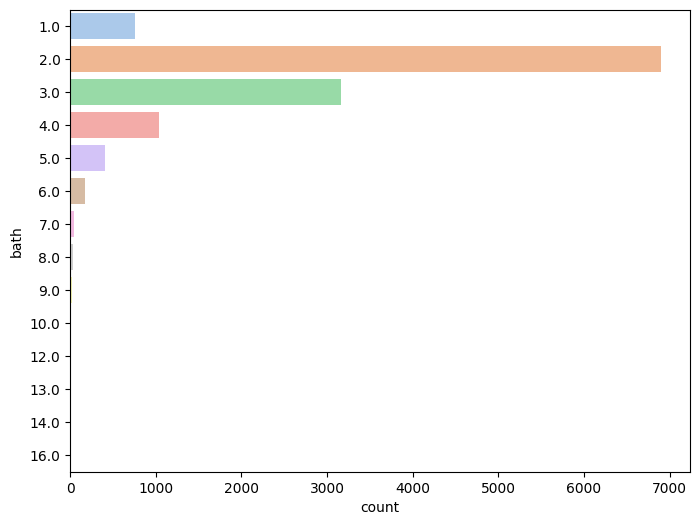

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y='bath',palette = 'pastel')

<Axes: xlabel='count', ylabel='bhk'>

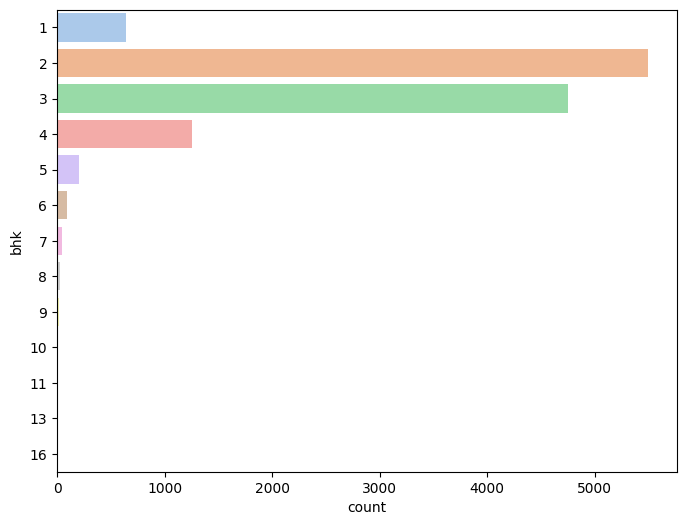

In [103]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y='bhk',palette = 'pastel')

<Axes: xlabel='price', ylabel='Density'>

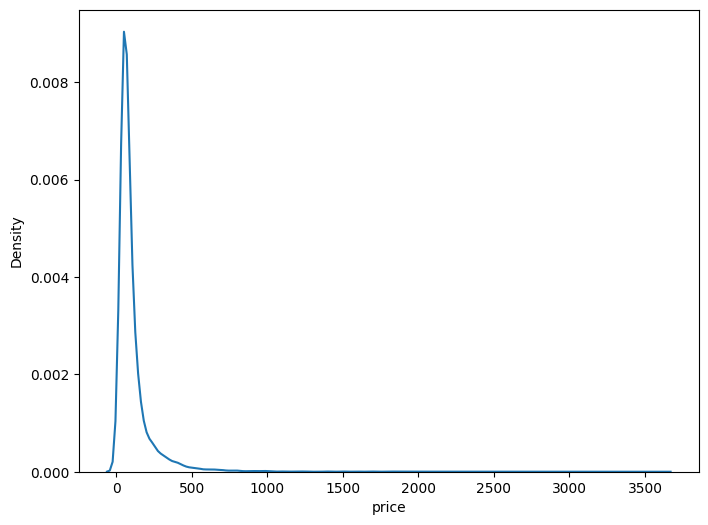

In [105]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df,x='price',palette = 'pastel')

<Axes: xlabel='price'>

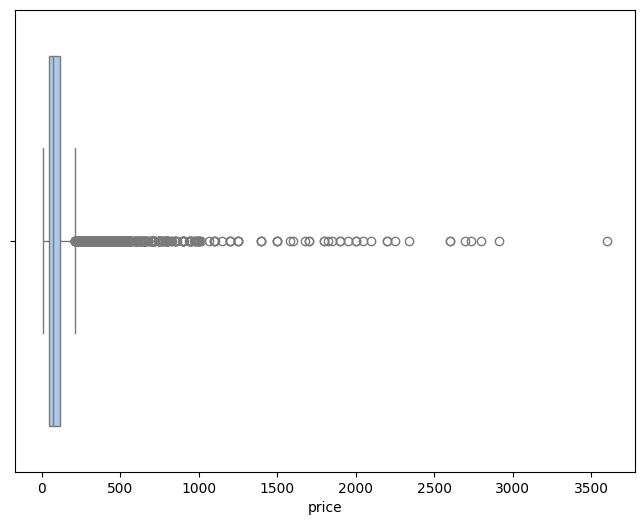

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='price',palette = 'pastel')

<Axes: xlabel='total_sqft', ylabel='Density'>

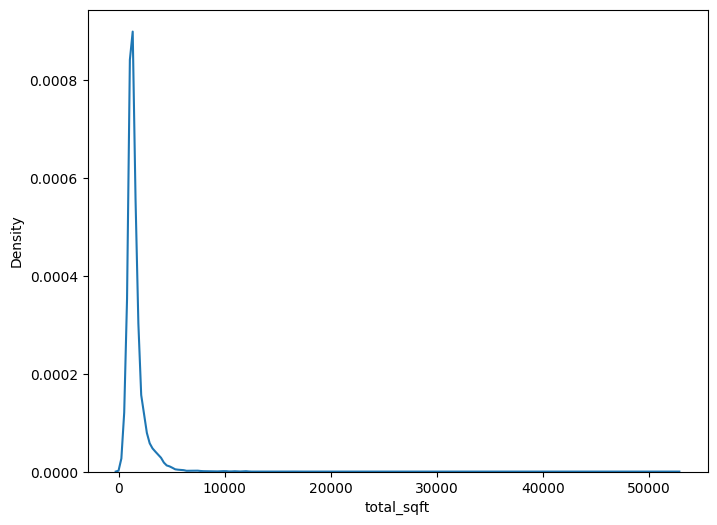

In [107]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df,x='total_sqft',palette = 'pastel')

<Figure size 800x600 with 0 Axes>

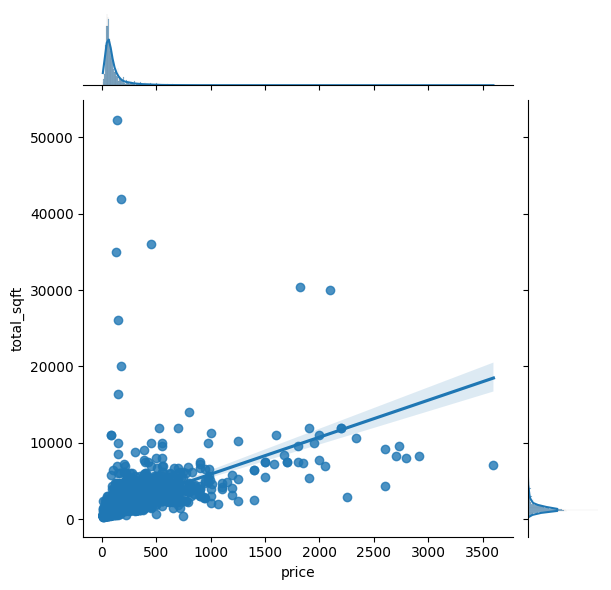

In [108]:
# Plot between total_sqft and price:
plt.figure(figsize=(8, 6))
sns.jointplot(data=df,y='total_sqft',x='price',kind='reg')